In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [84]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

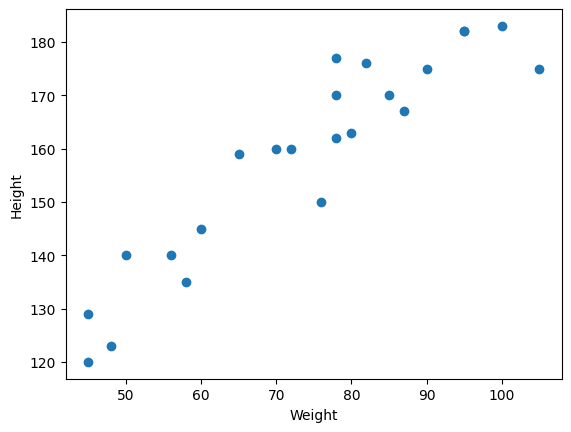

In [85]:
#scatter plot
plt.scatter(df.Weight, df.Height) # can be either plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [86]:
#finding corelation (how strongly two variables are related to each other) 
#(between -1 to 0 is negative correlation and between 0 to 1 is positive correlation)
correlation = df.corr()
print(correlation)

          Weight    Height
Weight  1.000000  0.931142
Height  0.931142  1.000000


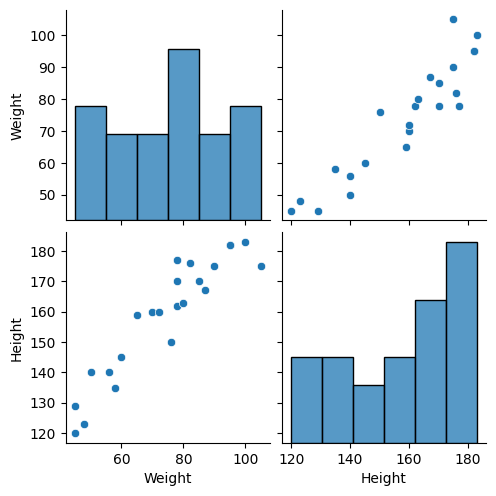

In [87]:
sns.pairplot(df)

In [88]:
# independent and dependent features
X = df[['Weight']]  # independent feature (dataFrame of 2D array)
y = df['Height']   # dependent feature series (1D array)
type(X) #dataFrame
type(y) #series

pandas.core.series.Series

In [89]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(X,y, test_size=0.25,
                                                     random_state=42)

In [90]:
x_train.shape

(17, 1)

In [91]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) 
#diffrence between fit and fit_transform is fit only calculates the mean and
# std deviation but fit_transform does both calculation and transformation
x_test = scaler.transform(x_test)

In [92]:
#apply simple linear regression
from sklearn.linear_model import LinearRegression
regession = LinearRegression()
regession.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [93]:
print("Ceofficients or slope: ", regession.coef_)
print("Intercept: ", regession.intercept_)

Ceofficients or slope:  [17.2982057]
Intercept:  156.47058823529412


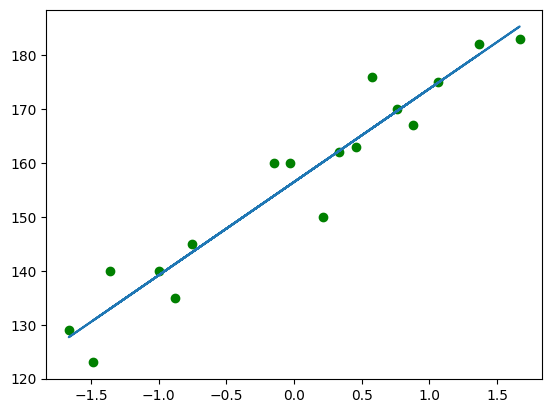

In [94]:
#plot best fit line
predicted_y = regession.predict(x_train)
plt.scatter(x_train,y_train, color='green')
plt.plot(x_train, predicted_y) 

In [95]:
#checking accuracy with performance metrics

# R squared error
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y_pred = regession.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("R squared error: ", r2)

#adjusted R squared error
n = len(y_test)
p = x_train.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R squared error: ", adjusted_r2)

#mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

#mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)

#root mean squared error
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

R squared error:  0.7360826717981276
Adjusted R squared error:  0.6701033397476595
Mean Squared Error:  114.84069295228699
Mean Absolute Error:  9.66512588679501
Root Mean Squared Error:  10.716374991212605


In [ ]:
# OLS linear regression summary
import statsmodels.api as sm
model = sm.OLS(y_train,x_train).fit()

In [103]:
prediciton = model.predict(x_test)
print(prediciton)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [104]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sun, 23 Nov 2025   Prob (F-statistic):                       0.664
Time:                        18:29:38   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

d:\github ML REPO\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [106]:
## predicting for a new data point
new_weight = [[150]]  # example weight value
new_weight_scaled = scaler.transform(new_weight)
predicted_height = regession.predict(new_weight_scaled)
print(f"Predicted height for weight {new_weight[0][0]} is {predicted_height[0]}")
# same can be done with a single line
regession.predict(scaler.transform([[150]]))

Predicted height for weight 150 is 237.715599126327


d:\github ML REPO\venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
d:\github ML REPO\venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([237.71559913])